# 五王之战分析 - 冰与火之歌

## 简介

五王之战（War of the Five Kings）是著名严肃奇幻小说《冰与火之歌》中的著名内战。这是一场规模空前、波及七大王国的内乱。顾名思义，前后共有五人在战争中称王：乔佛里、史坦尼斯、蓝礼均声称自己是铁王座的合法继承人。除此之外，罗柏·史塔克被北境众封臣推选为北境之王，巴隆·葛雷乔伊亦再度掀起独立大旗，欲摆脱铁王座的统治，自称为铁群岛之王。



本数据集(battles.csv)包含了五王之战期间的战争，它是所有战斗的大集合。该数据是Kaggle中[Game of Thrones](https://www.kaggle.com/mylesoneill/game-of-thrones)的一部分。

数据中的变量含义解释：
```
name: 战争的名称，字符变量。
year: 战争发生的年份，数值变量。
battle_number: 本数据中的unique id，对应每一场独立的战役，数值变量。
attacker_king: 攻击方的国王，"/"表示了国王的更换。例如："Joffrey/Tommen Baratheon"意味着Tomen Baratheon继承了Joffrey的王位，分类变量。
defender_king: 防守方的国王，分类变量。
attacker_1: 攻击方将领，字符变量。
attacker_2: 攻击方将领，字符变量。
attacker_3: 攻击方将领，字符变量。
attacker_4: 攻击方将领，字符变量。
defender_1: 防守方将领，字符变量。
defender_2: 防守方将领，字符变量。
defender_3: 防守方将领，字符变量。
defender_4: 防守方将领，字符变量。
attacker_outcome: 从攻击方角度来看的战争结果，分别有：win, loss, draw，分类变量。
battle_type: 战争的类别。pitched_battle: 双方军队在一个地点相遇并战斗，这也是最基本的战争类别；ambush: 以隐身或诡计为主要攻击手段的战争；siege: 阵地战；razing: 对未设防位置的攻击。分类变量。
major_death: 是否有重要人物的死亡，二进制变量。
major_capture: 是否有重要人物的被捕，二进制变量。
attacker_size: 攻击方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
defender_size: 防守方力量的大小，并未对骑兵、步兵等士兵种类有所区分，数值变量。
attacker_commander: 攻击方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
defender_commander: 防守方的主要指挥官。指挥官的名字中并没有包含头衔，不同的指挥官名字用逗号隔开，字符变量。
summer: 战争是否发生于夏天，二进制变量。
location: 战争发生的地点，字符变量。
region: 战争发生的地域，包括：Beyond the Wall, The North, The Iron Islands, The Riverlands, The Vale of Arryn, The Westerlands, The Crownlands, The Reach, The Stormlands, Dorne，分类变量。
note: 注释，字符变量。

```

## 项目完成指南



本项目中的数据分析流程已经给出，但代码将完全由你自己进行书写，如果你无法完成本项目，说明你目前的能力并不足以完成 数据分析(进阶)纳米学位，建议先进行 数据分析（入门）纳米学位的学习，掌握进阶课程的先修知识。

对于数据分析过程的记录也是数据分析报告的一个重要部分，你可以自己在需要的位置插入Markdown cell，记录你在数据分析中的关键步骤和推理过程。比如：数据有什么样的特点，统计数据的含义是什么，你从可视化中可以得出什么结论，下一步分析是什么，为什么执行这种分析。如果你无法做到这一点，你也无法通过本项目。

## 提出问题

在此项目中，你将以一名数据分析师的身份执行数据的探索性分析。你将了解数据分析过程的基本流程。在你分析数据之前，请先思考几个你需要理解的关于这些战斗的问题，例如，哪一个区域发生了最多的战争？哪一个国王获得了最多的胜利？战争的胜利与否受那些关键因素的影响？

**问题**：请写下你感兴趣的问题，请确保这些问题能够由现有的数据进行回答。
（为了确保学习的效果，请确保你的数据分析报告中能够包含2幅可视化和1个相关性分析。）

**答案**：对随着时间变化的情况下，战争是怎么样演化的，战斗状态变化。例如年份变化下，战争发生次数变化；战争发起方的战争最失败与成功情况；战争参与人数与战争输赢之间的关系；随着时间变化，战斗激烈程度和战斗类型


在提出了问题之后，我们将开始导入数据，并对数据进行探索性分析，来回答上面提出的问题。

## 数据评估和清理

In [1]:
# TO DO: load pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpathes
from matplotlib.lines import Line2D
from copy import deepcopy
%matplotlib inline

In [2]:
# TO DO: load the dataset
data = pd.read_csv("./data/battles.csv")

In [3]:
# TO DO: check the dataset general info
data.head(3)

,name,year,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
0,Battle of the Golden Tooth,298,1,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,1.0,0.0,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",1.0,Golden Tooth,The Westerlands,NaN
1,Battle at the Mummer's Ford,298,2,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Baratheon,...,1.0,0.0,NaN,120.0,Gregor Clegane,Beric Dondarrion,1.0,Mummer's Ford,The Riverlands,NaN
2,Battle of Riverrun,298,3,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,NaN,NaN,Tully,...,0.0,1.0,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",1.0,Riverrun,The Riverlands,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 25 columns):
name                  38 non-null object
year                  38 non-null int64
battle_number         38 non-null int64
attacker_king         36 non-null object
defender_king         35 non-null object
attacker_1            38 non-null object
attacker_2            10 non-null object
attacker_3            3 non-null object
attacker_4            2 non-null object
defender_1            37 non-null object
defender_2            2 non-null object
defender_3            0 non-null float64
defender_4            0 non-null float64
attacker_outcome      37 non-null object
battle_type           37 non-null object
major_death           37 non-null float64
major_capture         37 non-null float64
attacker_size         24 non-null float64
defender_size         19 non-null float64
attacker_commander    37 non-null object
defender_commander    28 non-null object
summer                37 non-null flo

In [5]:
data.shape

(38, 25)

In [6]:
# the note can't express the data, and it just describe war
len(data["note"].unique())

6

In [7]:
# drop the columns, which is not meaning information
data.drop(["battle_number", "note", "defender_3", "defender_4", "attacker_3", "attacker_4"], axis=1, inplace=True)

In [8]:
data.columns

Index(['name', 'year', 'attacker_king', 'defender_king', 'attacker_1',
       'attacker_2', 'defender_1', 'defender_2', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region'],
      dtype='object')

In [9]:
data["major_death"].unique()

array([ 1.,  0., nan])

In [10]:
data["major_capture"].unique()

array([ 0.,  1., nan])

In [11]:
data["summer"].unique()

array([ 1., nan,  0.])

In [12]:
# change the binary numeric into a meaning information
# the missing value changes into no
def binary_change(element):
    if element == 1.:
        return "Yes"
    else:
        return "No"
data.loc[:, ["major_death", "major_capture", "summer"]]=data.loc[:, ["major_death", "major_capture", "summer"]].applymap(binary_change)    

In [13]:
data["year"] = data["year"].astype(dtype="category")

In [14]:
data["year"].unique()

[298, 299, 300]
Categories (3, int64): [298, 299, 300]

In [15]:
data.shape

(38, 19)

## 评估数据结果
* 该数据中有 `38` 个数据样本，其中有些数据没有有效数据，例如 `defender_3` 和 `defender_4` 列；有些列没有提供足够有效分析信息，例如 `note` 、`attacker_3`、`attacker_4`和 `battle_number` 。针对这类数据采取了删除列的措施，最终数据为 `38` 个数据点和 `21` 个特征列。
* 此外对于二进制数据进行调整，还原为本来信息。例如：`major_death`、`major_capture` 和 `summer` 等调整为原来的 ”Yes“ 或者 ”No“ 值。另外对于其中缺失值，采取设定为 "No" 的方式，该依据是因为这里的值只有两类而且判断是否有值较容易。

## 数据探索分析

In [16]:
# In exploratory data analysis, please make sure of using statistics and visualizations
year = tuple(data["year"].unique())
frequecy = tuple(data.groupby("year")["year"].count().values)
year_frequency = pd.DataFrame({"year":year, "frequency":frequecy}, columns=["year", "frequency"])

In [17]:
year_frequency

,year,frequency
0,298,7
1,299,20
2,300,11


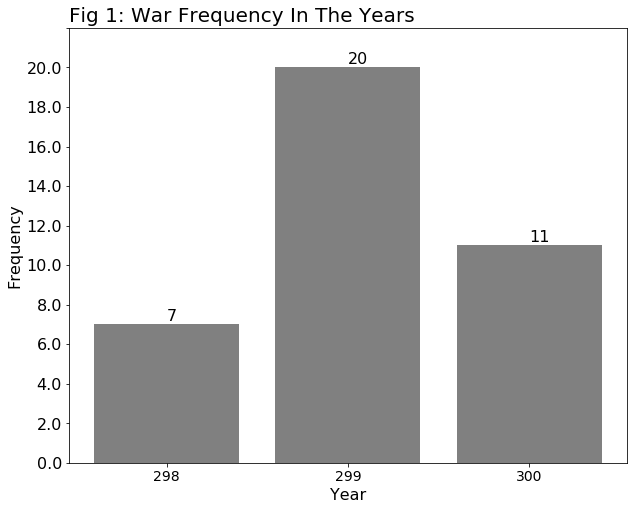

In [18]:
plt.figure(figsize=(10, 8))
plt.bar(x=year, height=frequecy, color="grey")
plt.title("Fig 1: War Frequency In The Years", loc="left", fontsize=20)
plt.xlabel("Year", fontsize=16)
plt.ylabel("Frequency", fontsize=16)

plt.xticks(year)
plt.ylim(0, 22)

ax = plt.gca()
ax.axes.set_yticks(np.arange(ax.axes.get_yticks()[0], ax.axes.get_yticks()[-1], 2))
ax.axes.set_yticklabels(labels=np.arange(ax.axes.get_yticks()[0], ax.axes.get_yticks()[-1], 2),fontsize=16)


ax.axes.set_xticklabels(labels=ax.axes.get_xticks(), fontsize=14)

# show frequecy
for x, y in zip(year, frequecy):
    plt.text(x=x, y=y+0.2, s=y, fontsize=16, color="black")
plt.show()

## 1. 五王之战中战争频次分析
从 `Fig 1` 中，可知五王之战总共发生了 `3` 年，其中在第二年战争最激烈——共发生了20次；在第一年中发生了 `7` 次；最后一年发生了 `11` 次。

In [19]:
data.columns

Index(['name', 'year', 'attacker_king', 'defender_king', 'attacker_1',
       'attacker_2', 'defender_1', 'defender_2', 'attacker_outcome',
       'battle_type', 'major_death', 'major_capture', 'attacker_size',
       'defender_size', 'attacker_commander', 'defender_commander', 'summer',
       'location', 'region'],
      dtype='object')

In [20]:
attacker_year = pd.DataFrame(data.groupby(["year", "attacker_outcome", "attacker_1"])["attacker_1"].count())

In [21]:
attacker_year.columns = ["attack_outcome"]

In [22]:
# change the value if lose the attack
for order, index in enumerate(attacker_year.index):
    if index[1] == "loss":
        attacker_year.iloc[order, :] *= -1


In [23]:
attacker_year

attack_outcome
year attacker_outcome attacker_1                                 
298  loss             Stark                                    -1
     win              Lannister                                 4
                      Stark                                     2
299  loss             Baratheon                                -1
                      Lannister                                -1
                      Stark                                    -1
     win              Baratheon                                 1
                      Bolton                                    1
                      Brotherhood without Banners               1
                      Darry                                     1
                      Frey                                      2
                      Greyjoy                                   5
                      Lannister                                 2
                      Stark                                     4
300  loss             Free folk                                -1
     win              Baratheon                                 3
                      Bolton                                    1
                      Bracken                                   1
                      Brave Companions                          1
                      Greyjoy                                   2
                      Lannister                                 1

In [24]:
attacker_win = attacker_year.query('attacker_outcome=="win"')
attacker_loss = attacker_year.query('attacker_outcome=="loss"')

axis_index = [0]
axis_label = []
color_index = ["g", "c", "y"]
for loc, index in enumerate(attacker_win.index.get_values()):
    axis_label.append(index[2])
    try:
        if index[0] == attacker_win.index.get_values()[loc-1][0]:
            axis_index.append(axis_index[loc-1] + 1)
            color_index.insert(loc, color_index[loc-1])
        elif index[0] > attacker_win.index.get_values()[loc-1][0]:
            axis_index.append(axis_index[loc-1] + 3)
#             color_index.insert(loc, color_index[loc])
    except:
        continue


In [25]:
# fix the data about loss attack
color_index0 = pd.Series(color_index)
# color_index0 = color_index0.map({"g":"m", "c":"r", "y":"b"})
loss_value = []
loopcount = 0
for loc, index in enumerate(attacker_win.index.get_values()):
    if attacker_loss.index.get_values()[loopcount][0] == index[0]:
        if attacker_loss.index.get_values()[loopcount][2] == index[2]:
            loss_value.append(list(attacker_loss["attack_outcome"])[loopcount])
            loopcount += 1
        else:
            loss_value.append(0)

# fix the data
axis_index0 = deepcopy(axis_index)
axis_index0.append(axis_index0[-1] + 1)
axis_label0 = deepcopy(axis_label)
axis_label0.append("Free fold")
color_index0 = color_index0.append(pd.Series(["y"]))
loss_value.append(-1)

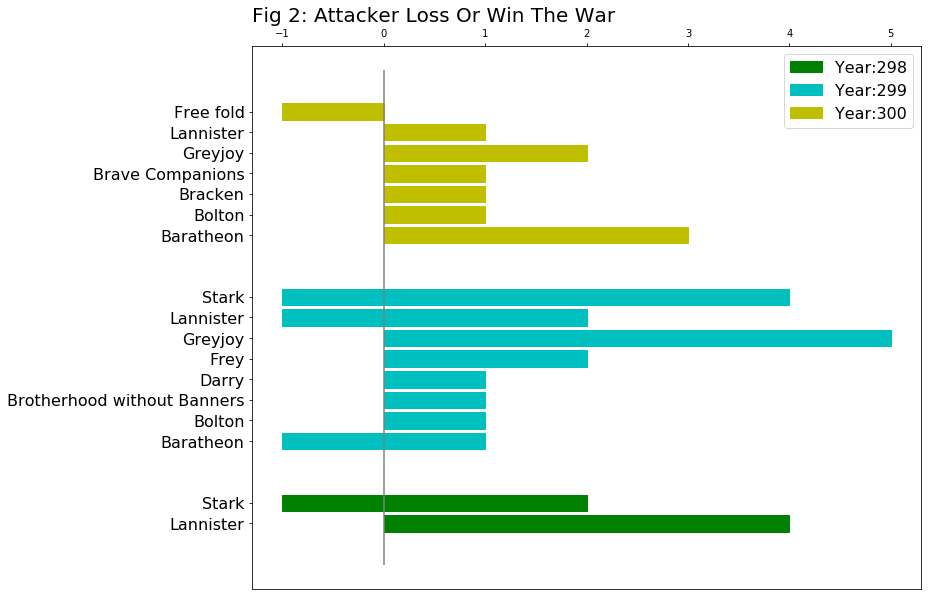

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)

bar_width = 0.3

# win attack 
rects_win = ax.barh(axis_index, attacker_win["attack_outcome"] )

for i, child in enumerate(rects_win.get_children()):
    child.axes.set_yticks(axis_index)
    child.axes.set_yticklabels(labels=axis_label)
    child.axes.tick_params(labeltop=True, top=True, labelbottom=False, bottom=False)
    child.set_color(color_index[i])
    
# loss attack
rects_loss = ax.barh(axis_index0, loss_value)


for i, child in enumerate(rects_loss.get_children()):
    child.axes.set_yticks(axis_index0)
    child.axes.set_yticklabels(labels=axis_label0, fontsize=16)
    child.axes.tick_params(labeltop=True, top=True, labelbottom=False, bottom=False)
    child.set_color(color_index0.iloc[i])    
# set the legend by Patch
handles = []
for color, label in zip(["g", "c", "y"], ["Year:298", "Year:299", "Year:300"]):
     handles.append(mpathes.Patch(color=color, label=label))
plt.legend(handles=handles, loc='best', fontsize=16)

ax.set_title("Fig 2: Attacker Loss Or Win The War", fontsize=20, loc="left", pad=24) # use pad to shift the title
# ax.xaxis.grid(c="grey", linestyle="--")
ax.vlines(0,axis_index0[0]-2, axis_index0[-1]+2, color="grey", linestyle="-" )
plt.show()

In [27]:
attacker = pd.DataFrame(data.groupby(["attacker_1", "attacker_outcome"])["attacker_outcome"].count())

In [28]:
attacker.unstack()

attacker_outcome     
attacker_outcome                        loss  win
attacker_1                                       
Baratheon                                1.0  4.0
Bolton                                   NaN  2.0
Bracken                                  NaN  1.0
Brave Companions                         NaN  1.0
Brotherhood without Banners              NaN  1.0
Darry                                    NaN  1.0
Free folk                                1.0  NaN
Frey                                     NaN  2.0
Greyjoy                                  NaN  7.0
Lannister                                1.0  7.0
Stark                                    2.0  6.0

## 2. 战争发动者在各年份成功与否
1. `Lannister` `Greyjoy`， `Stark`发动战争次数最多，其中 `Greyjoy` 没有败绩， `Lannister` 失败一次，`Stark` 失败了两次
2. 其他人中没有败绩的人为 `Bolton`，`Bracken`，`Brave Companions`，`Brotherhood without Banners`，`Darry` 以及 `Frey`，但是这些人发动战阵次数较少
3. `Free folk` 发动了一次战争，并且失败而告终
4. 在第二年之后战争发生次数增加，发动战争的人数增多

In [29]:
war_size = data[["attacker_size", "defender_size", "attacker_outcome"]]

In [30]:
war_size_nonull = war_size.dropna(axis=0, how="all", subset=["attacker_size", "defender_size"])
war_size_nonull.fillna(value=0, inplace=True)

color_seq = []

for i in war_size_nonull["attacker_outcome"]:
    if i == "win":
        color_seq.append("green")
    elif i == "loss":
        color_seq.append("red")
    else:
        color_seq.append("black")


/Users/renrui/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


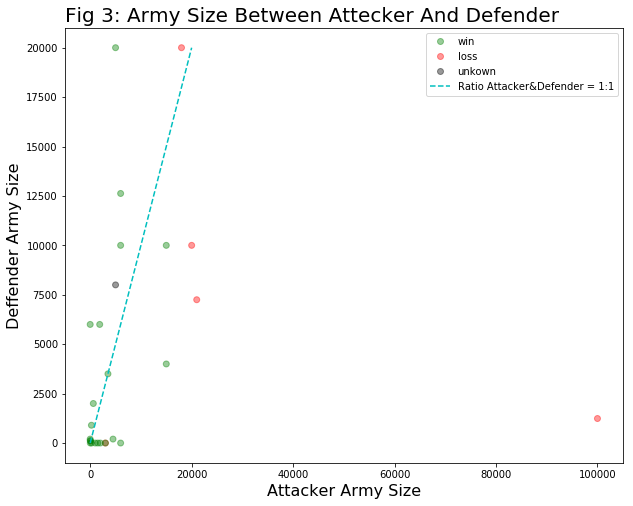

In [31]:
plt.figure(figsize=(10, 8))
y_axis = np.arange(0, war_size_nonull["defender_size"].max())
x_axis = np.arange(0, war_size_nonull["defender_size"].max())

scatter = plt.scatter(war_size_nonull["attacker_size"], war_size_nonull["defender_size"],c=color_seq, alpha=0.4)
line = plt.plot(x_axis, y_axis, "c--")
plt.title("Fig 3: Army Size Between Attecker And Defender", fontsize=20, loc="left")
plt.xlabel("Attacker Army Size", fontsize=16)
plt.ylabel("Deffender Army Size", fontsize=16)

# create the legend
handles = []
for color, label in zip(["green", "red", "black"], ["win", "loss", "unkown"]):
    handle = Line2D([], [], linestyle=" ", marker="o", color=color, label=label, alpha=0.4)
    handles.append(handle)
    
handles.append(Line2D([], [], linestyle="--",  color="c", label="Ratio Attacker&Defender = 1:1"))

plt.legend(handles=handles)

plt.show()

In [32]:
print("The number of the missing value is %d. The total number of smaple is %d." % (war_size.shape[0] - war_size_nonull.shape[0], war_size.shape[0]))

The number of the missing value is 11. The total number of smaple is 38.


In [33]:
data.groupby("attacker_outcome")["attacker_outcome"].count() / len(data)

attacker_outcome
loss    0.131579
win     0.842105
Name: attacker_outcome, dtype: float64

## 3. 战争参与人数与战争关系
* 在数据集中有 `11` 个样本点中防守和进攻方没有数据描述，将相关数据抛弃。因此将余下的 `27` 个样本点绘制出攻守双方人员人数以及输赢关系图。从上图中，可以看出投入战争的人数和战争输赢之间没有必然的相关性，上图中有统计人数的共有 `4` 次发动战争方是失败的，另有一次是结果不明。
* 同时从结果中可以看出，主动出击一方更容易获取战争的胜利。从完整的数据集来看，主动出击的胜利率为 `84.21%`

In [34]:
battle_type = data.groupby(["year", "battle_type"])["battle_type"].count()

In [35]:
battle_type = battle_type.unstack()
battle_type.fillna(value=0., inplace=True)

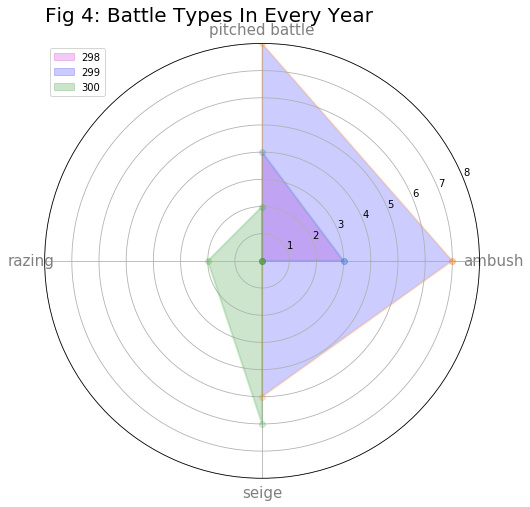

In [36]:
# create label
labels = ["ambush", "pitched battle", "razing", "seige"]
dataLength = len(labels)
# create angle
angles = np.linspace(0, 2*np.pi, dataLength, endpoint=False)
angles = np.concatenate((angles, [angles[0]]))

plt.figure(figsize=(10, 8))
handles = []
for year, color in zip(["298", "299", "300"], ["m", "b", "g"]):
    radar_data = battle_type.query('year==%s' % year)
    radar_data = pd.concat([radar_data, radar_data.iloc[:, 0]], axis=1)    
    plt.polar(angles, radar_data.values[0], "o-", linewidth=2, alpha=0.2)
    plt.fill(angles, radar_data.values[0], facecolor=color, alpha=0.2)
    
    # create the legend
    handle = mpathes.Patch(color=color, label=year, alpha=0.2)
    handles.append(handle)


plt.ylim(0, battle_type.max().max())
# create the label about the data
plt.thetagrids(angles*180/np.pi, labels, fontsize=15, color="grey")
# plot the legend and labels
plt.legend(handles=handles, loc="best")
plt.title("Fig 4: Battle Types In Every Year", loc="left", fontsize=20, pad=22)

ax = plt.gca()
plt.show()

In [37]:
battle_type

battle_type,ambush,pitched battle,razing,siege
year,,,,
298,3.0,4.0,0.0,0.0
299,7.0,8.0,0.0,5.0
300,0.0,2.0,2.0,6.0


## 4. 战争类型变化
从上图中可以看出随着时间的不同变化，战争类型和不同斗争方式也在变化。可以分别得出以下结论：
1. 随着时间战争开始、高潮到结束三个阶段，遭遇战、阵地战和诡计类手段变化符合这种趋势
2. 在战争后期，因为是小规模战役所以偶有使用对未设防位置进行攻击的手段
3. 战争高潮阶段，使用的不同作战手段的次数增加

在数据的探索性分析中，请确保你对数据分析中的关键步骤和推理过程进行了记录。你可以自己插入code cell和markdown cell来组织你的报告。

In [38]:
from statsmodels.discrete.discrete_model import Logit

In [39]:
data.head(10)

,name,year,attacker_king,defender_king,attacker_1,attacker_2,defender_1,defender_2,attacker_outcome,battle_type,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region
0,Battle of the Golden Tooth,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,Tully,NaN,win,pitched battle,Yes,No,15000.0,4000.0,Jaime Lannister,"Clement Piper, Vance",Yes,Golden Tooth,The Westerlands
1,Battle at the Mummer's Ford,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,Baratheon,NaN,win,ambush,Yes,No,NaN,120.0,Gregor Clegane,Beric Dondarrion,Yes,Mummer's Ford,The Riverlands
2,Battle of Riverrun,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,Tully,NaN,win,pitched battle,No,Yes,15000.0,10000.0,"Jaime Lannister, Andros Brax","Edmure Tully, Tytos Blackwood",Yes,Riverrun,The Riverlands
3,Battle of the Green Fork,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,NaN,Lannister,NaN,loss,pitched battle,Yes,Yes,18000.0,20000.0,"Roose Bolton, Wylis Manderly, Medger Cerwyn, H...","Tywin Lannister, Gregor Clegane, Kevan Lannist...",Yes,Green Fork,The Riverlands
4,Battle of the Whispering Wood,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,Lannister,NaN,win,ambush,Yes,Yes,1875.0,6000.0,"Robb Stark, Brynden Tully",Jaime Lannister,Yes,Whispering Wood,The Riverlands
5,Battle of the Camps,298,Robb Stark,Joffrey/Tommen Baratheon,Stark,Tully,Lannister,NaN,win,ambush,No,No,6000.0,12625.0,"Robb Stark, Tytos Blackwood, Brynden Tully","Lord Andros Brax, Forley Prester",Yes,Riverrun,The Riverlands
6,Sack of Darry,298,Joffrey/Tommen Baratheon,Robb Stark,Lannister,NaN,Darry,NaN,win,pitched battle,No,No,NaN,NaN,Gregor Clegane,Lyman Darry,Yes,Darry,The Riverlands
7,Battle of Moat Cailin,299,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,Stark,NaN,win,pitched battle,No,No,NaN,NaN,Victarion Greyjoy,NaN,Yes,Moat Cailin,The North
8,Battle of Deepwood Motte,299,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,Stark,NaN,win,siege,No,No,1000.0,NaN,Asha Greyjoy,NaN,Yes,Deepwood Motte,The North
9,Battle of the Stony Shore,299,Balon/Euron Greyjoy,Robb Stark,Greyjoy,NaN,Stark,NaN,win,ambush,No,No,264.0,NaN,Theon Greyjoy,NaN,Yes,Stony Shore,The North


In [40]:
# 创建和修改数据
analysis_data = data[["attacker_size", "defender_size", "attacker_outcome"]].copy(deep=True)
analysis_data.loc[:,"attacker_outcome"] = \
    analysis_data.loc[:,"attacker_outcome"].apply(lambda x :1 if x=="win" else 0)
    
analysis_data.dropna(subset=["attacker_size", "defender_size"], inplace=True)
# 创建 intercept 值
analysis_data["intercept"] = np.repeat(1, len(analysis_data))
# 构建模型
model = Logit(analysis_data["attacker_outcome"], analysis_data[["attacker_size", "defender_size", "intercept"]])

# 生成报告
result = model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.318098
         Iterations 8
                        Results: Logit
Model:              Logit            No. Iterations:   8.0000 
Dependent Variable: attacker_outcome Pseudo R-squared: 0.488  
Date:               2018-05-28 20:54 AIC:              16.1791
No. Observations:   16               BIC:              18.4969
Df Model:           2                Log-Likelihood:   -5.0896
Df Residuals:       13               LL-Null:          -9.9374
Converged:          1.0000           Scale:            1.0000 
--------------------------------------------------------------
                 Coef.  Std.Err.    z    P>|z|   [0.025 0.975]
--------------------------------------------------------------
attacker_size   -0.0002   0.0001 -1.9257 0.0541 -0.0005 0.0000
defender_size   -0.0001   0.0001 -0.6555 0.5122 -0.0004 0.0002
intercept        4.3836   2.2971  1.9083 0.0564 -0.1187 8.8859



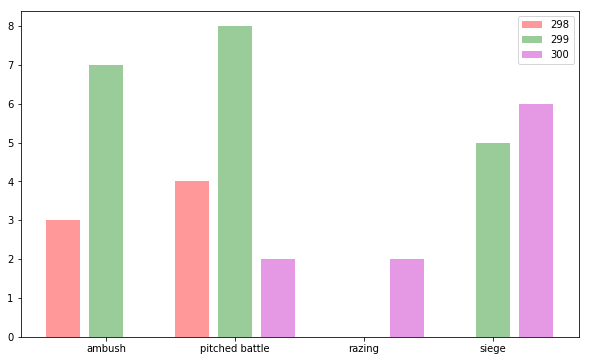

In [41]:
battle_type = data.groupby(["year", "battle_type"])["battle_type"].count()

battle_type = battle_type.unstack()
battle_type.fillna(value=0., inplace=True)

plt.figure(figsize=(10, 6))
x_axis = np.arange(0, 10, 3)
colors = ["r", "g", "m"]
year = ["298", "299", "300"]
for i in range(3):
    plt.bar(x=x_axis+i, height=battle_type.iloc[i, :].get_values(), alpha=0.4, label=year[i], facecolor=colors[i])

# locs, labels = plt.xticks()
locs = x_axis+1
labels = battle_type.columns.get_values()
plt.xticks(locs, labels)
plt.legend()
plt.show()

## 得出结论

**问题**：上面的分析能够回答你提出的问题？通过这些分析你能够得出哪些结论？

**答案**：在分析战争过程中，可以将对应的三个年份分别划分为战争初期、高潮和结束三个阶段。在战争中期的高潮阶段，发动战争频次和使用手段都增强。同时在主动发动战争的时候，反而更容易获取战争都胜利。战争胜利与否反而与攻击防守方兵力比例没有表现出相关性。

## 反思

**问题**：在你的分析和总结过程中是否存在逻辑严谨。是否有改进的空间? 你可以从下面的一些角度进行思考：
1. 数据集是否完整，包含所有想要分析的数据？
2. 在对数据进行处理的时候，你的操作（例如删除/填充缺失值）是否可能影响结论？
3. 是否还有其他变量（本数据中没有）能够对你的分析有帮助？
4. 在得出结论时，你是否混淆了相关性和因果性？

**答案**：从分析过程来看，数据集相对完整，但是数据存在缺失——这严重影响分析结果。分析参战人数比例时，采用了删除缺失值的策略，对结果影响不大；对战争类型分析时，采用了填充为 `0` 的方式，对结果表现不明——因为不能明确最后对战争胜利关系，也没有对这一点进行分析。目前阶段尚未有需要额外数据进行分析。

一些反思：在分析时候对数据整体把握还欠考虑，因为对五王战争的故事不明，只能单纯从数据触发去分析——这点是最大的弊病；目前还缺少对数据横向关系的分析，例如最终影响战争的因素有哪些——这点需要从建模方向去考虑

恭喜你完成了此项目！这只是数据分析过程的一个样本：从生成问题、整理数据、探索数据到得出结论。在数据分析(进阶)纳米学位中，你将会学到更多高级的数据分析方法和技术，如果你感兴趣的话，我们鼓励你继续学习后续的课程，掌握更多的数据分析的高级技能！

> 若想与他人分享我们的分析结果，除了向他们提供 jupyter Notebook (.ipynb) 文件的副本外，我们还可以将 Notebook 输出导出为一种甚至那些未安装 Python 的人都能打开的形式。从左上方的“文件”菜单，前往“下载为”子菜单。然后你可以选择一个可以更普遍查看的格式，例如 HTML (.html) 。你可能需要额外软件包或软件来执行这些导出。

## 参考
1. [matplotlib polar 雷达图](https://blog.csdn.net/claroja/article/details/78600011)
2. [Thumbnail gallery ](https://matplotlib.org/1.4.1/gallery.html)